# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [4]:
cat=Table.read('./data/dmu26_XID+SPIRE_NGP_cat.fits')
from astropy import units as u
cat['RA'].unit=u.deg
cat['Dec'].unit=u.deg

In [5]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J131004.293+223518.728,197.51788944743348,22.5885356597969,0.32292894,0.6590095,0.10386247,0.3445772,0.69254494,0.10776168,0.44435415,0.9271518,0.12404328,-0.025608882,-0.046275727,-0.10446722,0.017517826,0.023880487,0.036633205,1.0016024,0.99888325,0.99872845,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131007.938+223630.842,197.53307515743347,22.6085671797969,0.31104714,0.64256215,0.097385585,0.3165911,0.6529399,0.10218394,0.3893039,0.7709182,0.110540956,-0.025608882,-0.046275727,-0.10446722,0.017517826,0.023880487,0.036633205,1.0009762,1.0007366,1.0008824,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131016.574+223816.196,197.56905774814007,22.63783216264509,0.44857925,0.9701369,0.13426206,0.43697464,0.87526804,0.13397458,0.48740983,0.94735,0.14406255,-0.025608882,-0.046275727,-0.10446722,0.017517826,0.023880487,0.036633205,1.0009011,1.000664,0.9996336,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131021.813+223811.727,197.59088586277656,22.636590753046484,0.3030494,0.64327496,0.08457982,0.29245618,0.6277151,0.09012927,0.33845824,0.66801673,0.09783559,-0.025608882,-0.046275727,-0.10446722,0.017517826,0.023880487,0.036633205,0.99988425,0.99961096,1.000374,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131022.047+223708.157,197.59186095743348,22.6189325297969,0.35188988,0.72369677,0.106138036,0.33872542,0.71963304,0.10130674,0.3750417,0.7760622,0.11807447,-0.025608882,-0.046275727,-0.10446722,0.017517826,0.023880487,0.036633205,0.99921435,0.99965733,0.99827635,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131022.246+223739.746,197.5926925017849,22.627707353803736,0.32106858,0.6472171,0.0998541,0.2872683,0.6200173,0.08338349,0.27691758,0.588746,0.08849542,-0.025608882,-0.046275727,-0.10446722,0.017517826,0.023880487,0.036633205,1.0007584,1.0000997,0.9992842,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131028.711+223614.220,197.6196281774335,22.6039498697969,0.32290506,0.6548544,0.09948878,0.3092304,0.66342926,0.09019646,0.38883305,0.7806362,0.13342972,-0.025608882,-0.046275727,-0.10446722,0.017517826,0.023880487,0.036633205,0.99955547,0.9997195,0.99907887,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131029.879+223718.598,197.6244978774335,22.6218327797969,0.2406743,0.5501506,0.06741001,0.23236038,0.57080173,0.06287291,0.27022296,0.5868565,0.06908266,-0.025608882,-0.046275727,-0.10446722,0.017517826,0.023880487,0.036633205,0.9995129,0.9986524,0.9984265,2000.0,2000.0,2000.0,0.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


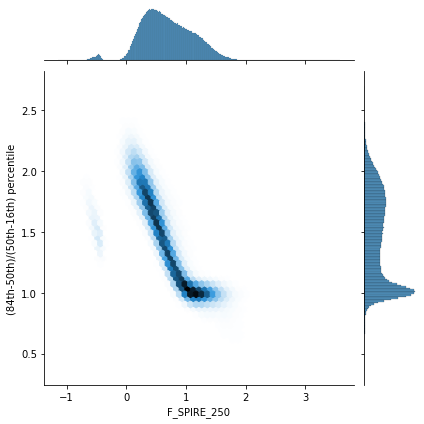

In [9]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE250_NGP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE250_NGP.png', bbox='tight')

In [11]:
10**0.8

6.309573444801933

For 250 $\mathrm{\mu m}$ depth is ~ 4mJy

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


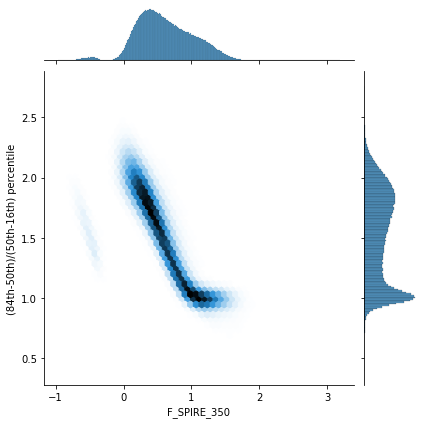

In [8]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE350_NGP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE350_NGP.png', bbox='tight')

For 350 $\mathrm{\mu m}$ depth is ~ 4mJy

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


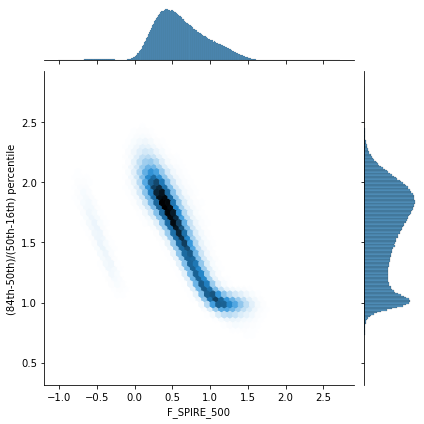

In [10]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')


g.savefig('../../data/figs/sk_SPIRE500_NGP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE500_NGP.png', bbox='tight')

For 500 $\mathrm{\mu m}$ depth is ~ 6mJy

## Add flag to catalogue

In [13]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [12]:
ind_SERVS_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 6)
ind_SERVS_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 6)
ind_SERVS_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 10)

In [14]:
print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(cat))

761530 844902 1052027 1233547


In [15]:
cat['flag_spire_250'][ind_SERVS_250]=True
cat['flag_spire_350'][ind_SERVS_350]=True
cat['flag_spire_500'][ind_SERVS_500]=True

In [16]:
cat.write('./data/dmu26_XID+SPIRE_NGP_20190310.fits', format='fits',overwrite=True)